<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-III/blob/main/DE_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Differential Equations : Boundary Value problems**

- **Dirichlet Boundary Conditions**: Value of the dependent variable is defined at the boundary.
- **Neumann Boundary conditions**: Value of the derivative of the dependent variable is defined at the boundary.
- **Robin Boundary conditions**: Linear combination of variable and it's derivatives are defined at the boundary

**Example 1:**
Solve
$$ \frac{d^2x}{dt^2} = - x $$
Boundary conditions (Dirichlet BC's) : $x(0) = x_i, x(1) = x_f$

Finite differences :
$$ \frac{d^2x}{dt^2} = \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} $$

So DE becomes:
$$ \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} = - x_i$$

$$ x_{i-1} - (2 + h^2) x_i + x_{i+1} = 0 $$

For $i=1$:
$$ x_0 - (2 + h^2) x_1 + x_2 = 0 $$
Boundary condition $x_0 = x_i$ resulting in equation to be:
$$ - (2 + h^2) x_1 + x_2 = - x_0$$
For $i=2$:
$$ x_1 - (2 + h^2) x_2 + x_3 = 0 $$
For $i=N$:
$$ x_{N-1} - (2 + h^2) x_N + x_{N+1} = 0 $$
Boundary condition $x_{N+1} = x_f$:
$$ x_{N-1} - (2 + h^2) x_N = - x_f $$

Resulting in matrix level equation ${\bf A} y = {\bf b}$

[[-6.  1.  0.  0.]
 [ 1. -6.  1.  0.]
 [ 0.  1. -6.  1.]
 [ 0.  0.  1. -6.]] [-1.  0.  0.  0.]


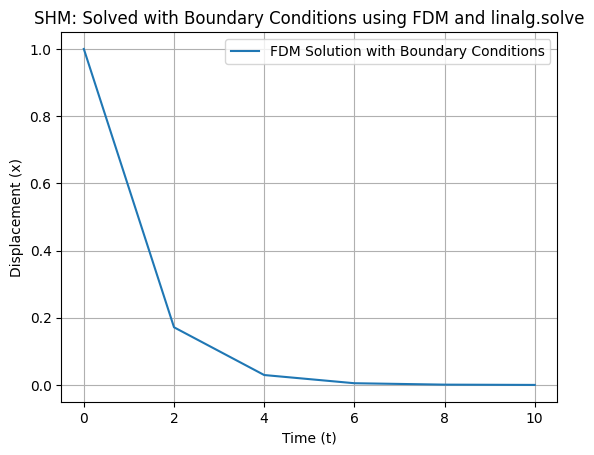

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Angular frequency (omega)
x0 = 1     # Boundary condition at t = 0
xf = 0   # Boundary condition at t = T
T = 10.0     # Total time
N = 4     # Number of internal grid points (excluding boundaries)
dt = T / (N + 1)  # Time step size

# Construct the tridiagonal matrix A
main_diag = -(2 + omega**2 * dt**2) * np.ones(N)    # Main diagonal
off_diag = np.ones(N-1)                             # Off-diagonals (sub/superdiagonal)

# Construct the tridiagonal matrix
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Right-hand side vector b (boundary conditions)
b = np.zeros(N)
b[0] = -x0  # Boundary condition at t = 0 affects the first row
b[-1] = -xf # Boundary condition at t = T affects the last row

# Solve the linear system A * x = b
x_internal = np.linalg.solve(A, b)

# Include the boundary conditions to get the full solution
x = np.concatenate(([x0], x_internal, [xf]))

print(A,b)

# Time array
t = np.linspace(0, T, N + 2)

# Plot the result
plt.plot(t, x, label='FDM Solution with Boundary Conditions')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('SHM: Solved with Boundary Conditions using FDM and linalg.solve')
plt.legend()
plt.grid(True)
plt.show()


**Example 1:**
Solve
$$ \frac{d^2y}{dx^2} = - \pi^2 sin(\pi x) $$
Boundary conditions : $y(0) = 0, y(1) = 0$

[[-72.  36.   0.   0.   0.]
 [ 36. -72.  36.   0.   0.]
 [  0.  36. -72.  36.   0.]
 [  0.   0.  36. -72.  36.]
 [  0.   0.   0.  36. -72.]]


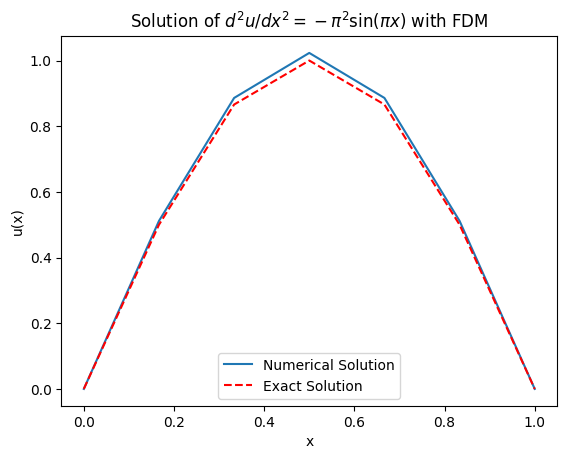

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
N = 5  # Number of grid points
a = 0    # Left boundary
b = 1    # Right boundary
h = (b - a) / (N + 1)  # Step size

# Define the grid points
x = np.linspace(a, b, N+2)  # Include boundary points

# Right-hand side of the differential equation (f(x) = -pi^2 * sin(pi * x))
f = -np.pi**2 * np.sin(np.pi * x[1:-1])

# Initialize the matrix A (tridiagonal matrix)
A = np.zeros((N, N))

# Fill the tridiagonal matrix A
for i in range(N):
    A[i, i] = -2 / h**2  # Diagonal elements
    if i > 0:
        A[i, i-1] = 1 / h**2  # Lower diagonal elements
    if i < N - 1:
        A[i, i+1] = 1 / h**2  # Upper diagonal elements

print(A)

# Solve the linear system A * u = f
u = np.linalg.solve(A, f)

# Add the boundary conditions (u(0) = 0 and u(1) = 0)
u = np.concatenate(([0], u, [0]))

# Plot the solution
plt.plot(x, u, label='Numerical Solution')
plt.plot(x, np.sin(np.pi * x), 'r--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution of $d^2u/dx^2 = -\pi^2 \sin(\pi x)$ with FDM')
plt.show()


**Example 1:**
Solve
$$ \frac{d^2x}{dt^2} = - x $$
Boundary conditions (Neumann BC's) : $x'(0) = v_0, x'(1) = v_f$

Finite differences :
$$ \frac{d^2x}{dt^2} = \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} $$

So DE becomes:
$$ \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} = - x_i$$

$$ x_{i-1} - (2 + h^2) x_i + x_{i+1} = 0 $$

This creates a set of linear equations $A x = b$. For interior points $b = 0$

The first equation is:
$$x_2 - 2 x_1 + x_0 = 0$$

BC at $x=0$ is :
$$ \frac{x_1 - x_0}{h} = v_0$$
$$ x_0 = x_1 - v_0 h $$

Hence the first equation becomes:
$$x_2 - 2 x_1 + (x_1 - v_0 h) = 0$$
$$x_2 - x_1   = v_0 h$$  

The rest of the equations remains the same.


Similarly at $x=xf$:
$$ \frac{x_n - x_{n-1}}{h} = v_f$$
$$ x_n = x_{n-1} + h v_f$$

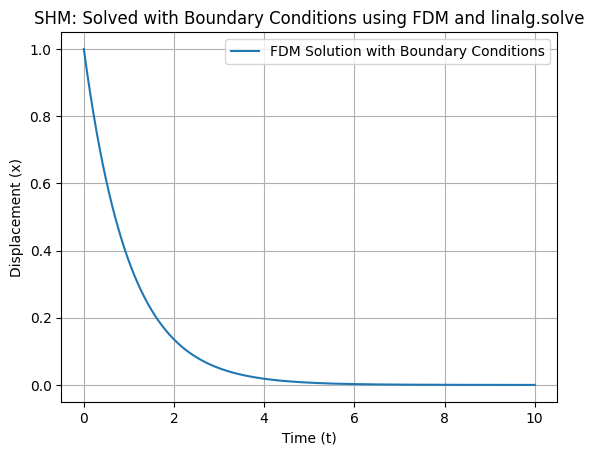

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Angular frequency (omega)
v0 = 0.5     # Boundary condition at t = 0
vf = 0.8    # Boundary condition at t = T
x0 = 1      # initial condition
T = 10.0     # Total time
N = 1000     # Number of internal grid points (excluding boundaries)
dt = T / (N + 1)  # Time step size

# Construct the tridiagonal matrix A
main_diag = -(2 + omega**2 * dt**2) * np.ones(N)    # Main diagonal
off_diag = np.ones(N-1)                             # Off-diagonals (sub/superdiagonal)

# Construct the tridiagonal matrix
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Right-hand side vector b (boundary conditions)
b = np.zeros(N)
b[0] = - x0 - v0*dt  # Boundary condition at t = 0 affects the first row
b[-1] = - vf # Boundary condition at t = T affects the last row

# Solve the linear system A * x = b
x_internal = np.linalg.solve(A, b)

# Include the boundary conditions to get the full solution
x = np.concatenate(([x0], x_internal, [xf]))

# Time array
t = np.linspace(0, T, N + 2)

# Plot the result
plt.plot(t, x, label='FDM Solution with Boundary Conditions')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('SHM: Solved with Boundary Conditions using FDM and linalg.solve')
plt.legend()
plt.grid(True)
plt.show()
